# CAP4633C Machine Learning II
## Presentation 3
### Victor Roa, Deany Rodriguez - 12/11/2021

<b>DATASET SUMMARY </b>

From USA Forensic Science Service; 6 types of glass; defined in terms of their oxide content (i.e. Na, Fe, K, etc) 

Creator:
B. GermanCentral Research EstablishmentHome Office Forensic Science ServiceAldermaston, Reading, Berkshire RG7 4PN

Donor:
Vina Spiehler, Ph.D., DABFTDiagnostic Products Corporation(213) 776-0180 (ext 3014)

<b>Attribute Information:</b>
1. Id number: 1 to 214 
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
    * 1 building windows float processed 
    * 2 building windows non float processed 
    * 3 vehicle windows float processed 
    * 4 vehicle windows non float processed (none in this database)
    * 5 containers 
    * 6 tableware 
    * 7 headlamps

The first step is to import our csv file and build a panda dataframe with it. The dataframe will be called gl_df. After creating it, it is always important to do an exploratory analisis and prepare the data for the modeling process.

In [1]:
import pandas as pd
gl_df = pd.read_csv('glass_data.csv')
gl_df

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


Here we can see that the column headers are not named correctly, and also, the column_a refers to an ID column, so it needs to be dropped.

In [2]:
gl_df = gl_df.drop(['column_a'], axis=1)
gl_df= gl_df.rename(columns={'column_b': 'RI', 
                             'column_c': 'Na',
                             'column_d': 'Mg',
                             'column_e': 'Al',
                             'column_f': 'Si',
                             'column_g': 'K',
                             'column_h': 'Ca',
                             'column_i': 'Ba',
                             'column_j': 'Fe',
                             'column_k': 'Class',})
gl_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


At the last preprocessing step, we will check if we have any null values, and if there are some, it is necessary to either drop them or replacing them with an statistical measure (median/mode).

Since our dataset doesn't have any null values in any of the columns, we can continue with the data processing.

In [3]:
import numpy as np
gl_df.isnull().sum()

RI       0
Na       0
Mg       0
Al       0
Si       0
K        0
Ca       0
Ba       0
Fe       0
Class    0
dtype: int64

First, let's import the sklearn library to split our dataset into train and testing dataset, with a random_state of 1, and a proportion of 75/25

In [4]:
from sklearn.model_selection import train_test_split

X= gl_df.iloc[:,:-1].values
y= gl_df.iloc[:, -1].values


X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.25, random_state=1)

Using the preprocessing libraries from sklearn, let's standarize the data

In [5]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [6]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

Import the required libraries and define the SBS class

In [7]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
       
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
#         kai add 20211207
        print('dim:',dim)
        print('score:',score)  
        print('subset:',self.subsets_)
        print('--------------------------------------------------------------')
#         kai add 20211207 end
        while dim > self.k_features:
            scores = []
            subsets = []
            
            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
                print('subset:',p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            print('dim:',dim) # kai add 20211207
#             print('subset:',p)
            self.scores_.append(scores[best])
            print('score:',scores[best])  # kai add 20211207
        self.k_score_ = self.scores_[-1]
       
       
        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

Using the SBS class and the KNeighborsClassifier build the model to evaluate the best possible feature selection 

In [8]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train)



dim: 9
score: 0.625
subset: [(0, 1, 2, 3, 4, 5, 6, 7, 8)]
--------------------------------------------------------------
subset: (0, 1, 2, 3, 4, 5, 6, 7)
subset: (0, 1, 2, 3, 4, 5, 6, 8)
subset: (0, 1, 2, 3, 4, 5, 7, 8)
subset: (0, 1, 2, 3, 4, 6, 7, 8)
subset: (0, 1, 2, 3, 5, 6, 7, 8)
subset: (0, 1, 2, 4, 5, 6, 7, 8)
subset: (0, 1, 3, 4, 5, 6, 7, 8)
subset: (0, 2, 3, 4, 5, 6, 7, 8)
subset: (1, 2, 3, 4, 5, 6, 7, 8)
dim: 8
score: 0.725
subset: (0, 2, 3, 4, 5, 6, 7)
subset: (0, 2, 3, 4, 5, 6, 8)
subset: (0, 2, 3, 4, 5, 7, 8)
subset: (0, 2, 3, 4, 6, 7, 8)
subset: (0, 2, 3, 5, 6, 7, 8)
subset: (0, 2, 4, 5, 6, 7, 8)
subset: (0, 3, 4, 5, 6, 7, 8)
subset: (2, 3, 4, 5, 6, 7, 8)
dim: 7
score: 0.7
subset: (0, 2, 3, 4, 5, 6)
subset: (0, 2, 3, 4, 5, 7)
subset: (0, 2, 3, 4, 6, 7)
subset: (0, 2, 3, 5, 6, 7)
subset: (0, 2, 4, 5, 6, 7)
subset: (0, 3, 4, 5, 6, 7)
subset: (2, 3, 4, 5, 6, 7)
dim: 6
score: 0.7
subset: (0, 2, 4, 5, 6)
subset: (0, 2, 4, 5, 7)
subset: (0, 2, 4, 6, 7)
subset: (0, 2, 5, 6, 7)
s

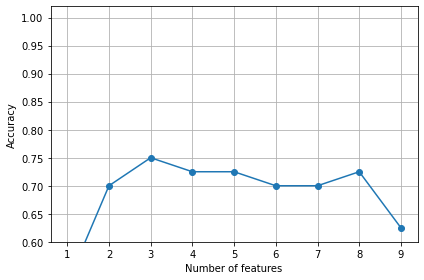

In [9]:
k_feat = [len(k) for k in sbs.subsets_]

plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.6, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()

Based on the model ran above, we can see that the best accuracy is obtained when using 3 features

In [10]:
k5 = list(sbs.subsets_[6])
print(gl_df.columns[1:][k5])

Index(['Na', 'Al', 'Ca'], dtype='object')


In [11]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))


Training accuracy: 0.8375
Test accuracy: 0.7037037037037037


In [12]:
knn.fit(X_train_std[:, k5], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k5], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k5], y_test))

Training accuracy: 0.84375
Test accuracy: 0.7592592592592593


Now we will evaluate the feature importance for the gl_df dataset, using the Sklearn RandomForestClassifier library

In [13]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = gl_df.columns[:-1]

forest = RandomForestClassifier(n_estimators=100,
                                random_state=1)

forest.fit(X_train, y_train)


RandomForestClassifier(random_state=1)

In [14]:
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]



 1) Mg                             0.163222
 2) Al                             0.160223
 3) RI                             0.141906
 4) Ca                             0.111530
 5) Na                             0.105531
 6) K                              0.102381
 7) Ba                             0.091497
 8) Si                             0.077734
 9) Fe                             0.045976


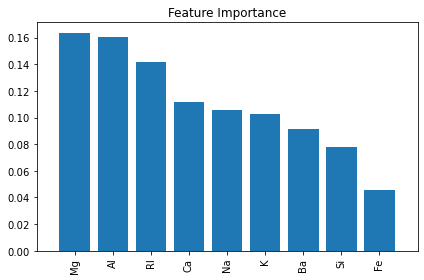

In [15]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [16]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.10, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', 
      X_selected.shape[1])

Number of features that meet this threshold criterion: 6


Now we can see that we have 6 features that meet the critearia, and since our model could perform better when usinf 3 features we can decide the best ones:

    1. Mg 
    2. Al
    3. RI

<b>MLXtend to obtain Best Feature Selection </b>

Now, Let's try to find the best feature selection using the MLXtend library

In [17]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS2
feature_names = feat_labels
sfs2 = SFS2(knn, 
           k_features=(1,9), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=0)
sfs2 = sfs2.fit(X, y, custom_feature_names=feature_names)
sfs2.subsets_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.0s finished

[2021-12-14 18:57:36] Features: 1/9 -- score: 0.6915887850467289[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished

[2021-12-14 18:57:36] Features: 2/9 -- score: 0.780373831775701[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.0s finished

[2021-12-14 18:57:36] Features: 3/9 -- score: 0.822429906542056[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 ou

{1: {'feature_idx': (3,),
  'cv_scores': array([0.69158879]),
  'avg_score': 0.6915887850467289,
  'feature_names': ('Al',)},
 2: {'feature_idx': (2, 3),
  'cv_scores': array([0.78037383]),
  'avg_score': 0.780373831775701,
  'feature_names': ('Mg', 'Al')},
 3: {'feature_idx': (2, 3, 5),
  'cv_scores': array([0.82242991]),
  'avg_score': 0.822429906542056,
  'feature_names': ('Mg', 'Al', 'K')},
 4: {'feature_idx': (2, 3, 5, 6),
  'cv_scores': array([0.84579439]),
  'avg_score': 0.8457943925233645,
  'feature_names': ('Mg', 'Al', 'K', 'Ca')},
 5: {'feature_idx': (2, 3, 4, 5, 6),
  'cv_scores': array([0.86448598]),
  'avg_score': 0.8644859813084113,
  'feature_names': ('Mg', 'Al', 'Si', 'K', 'Ca')},
 6: {'feature_idx': (0, 2, 3, 4, 5, 6),
  'cv_scores': array([0.86448598]),
  'avg_score': 0.8644859813084113,
  'feature_names': ('RI', 'Mg', 'Al', 'Si', 'K', 'Ca')},
 7: {'feature_idx': (0, 1, 2, 3, 4, 5, 6),
  'cv_scores': array([0.85981308]),
  'avg_score': 0.8598130841121495,
  'feature_

Best Combination (ACC: 0.769): (0, 2, 3, 5, 7)

all subsets:
 {1: {'feature_idx': (3,), 'cv_scores': array([0.46875, 0.5625 , 0.59375, 0.53125, 0.5    ]), 'avg_score': 0.53125, 'feature_names': ('3',)}, 2: {'feature_idx': (2, 3), 'cv_scores': array([0.625  , 0.65625, 0.65625, 0.625  , 0.65625]), 'avg_score': 0.64375, 'feature_names': ('2', '3')}, 3: {'feature_idx': (0, 2, 3), 'cv_scores': array([0.625  , 0.65625, 0.6875 , 0.78125, 0.8125 ]), 'avg_score': 0.7125, 'feature_names': ('0', '2', '3')}, 4: {'feature_idx': (0, 2, 3, 5), 'cv_scores': array([0.65625, 0.65625, 0.78125, 0.8125 , 0.8125 ]), 'avg_score': 0.74375, 'feature_names': ('0', '2', '3', '5')}, 5: {'feature_idx': (0, 2, 3, 5, 7), 'cv_scores': array([0.71875, 0.6875 , 0.78125, 0.84375, 0.8125 ]), 'avg_score': 0.76875, 'feature_names': ('0', '2', '3', '5', '7')}, 6: {'feature_idx': (0, 2, 3, 5, 7, 8), 'cv_scores': array([0.78125, 0.71875, 0.71875, 0.8125 , 0.78125]), 'avg_score': 0.7625, 'feature_names': ('0', '2', '3', '5', '

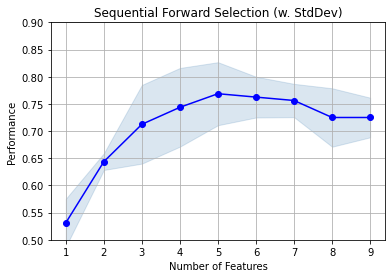

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

sfs1 = SFS2(estimator=knn, 
           k_features=(1,9),
           forward=True, 
           floating=False, 
           scoring='accuracy',
           cv=5)

pipe = make_pipeline(StandardScaler(), sfs1)

pipe.fit(X_train, y_train)

print('Best Combination (ACC: %.3f): %s\n' % (sfs1.k_score_, sfs1.k_feature_idx_))
print('all subsets:\n', sfs1.subsets_)

fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.5, 0.9])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [19]:

X_train_sfs = sfs2.transform(X_train)
X_test_sfs = sfs2.transform(X_test)
knn.fit(X_train_sfs, y_train)
y_pred = knn.predict(X_test_sfs)
acc = float((y_test == y_pred).sum()) / y_pred.shape[0]


X_train_sfs2 = sfs1.transform(X_train)
X_test_sfs2 = sfs1.transform(X_test)
knn.fit(X_train_sfs2, y_train)
y_pred2 = knn.predict(X_test_sfs2)
acc2 = float((y_test == y_pred2).sum()) / y_pred2.shape[0]

print('Test set accuracy for first model: %.2f %%' % (acc * 100))
print('Test set accuracy for second model: %.2f %%' % (acc2 * 100))

Test set accuracy for first model: 72.22 %
Test set accuracy for second model: 59.26 %


In [20]:
# Sequential Forward Selection
sfs = SFS2(knn, 
          k_features=(1,9), 
          forward=True, 
          floating=False, 
          scoring='accuracy',
          cv=5,
          n_jobs=-1)
sfs = sfs.fit(X, y)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print('CV Score:')
print(sfs.k_score_)

###################################################

# Sequential Backward Selection
sbs = SFS2(knn, 
          k_features=(1,9), 
          forward=False, 
          floating=False, 
          scoring='accuracy',
          cv=5,
          n_jobs=-1)
sbs = sbs.fit(X, y)

print('\nSequential Backward Selection (k=3):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)

###################################################

# Sequential Forward Floating Selection
sffs = SFS2(knn, 
           k_features=(1,9), 
           forward=True, 
           floating=True, 
           scoring='accuracy',
           cv=5,
           n_jobs=-1)
sffs = sffs.fit(X, y)

print('\nSequential Forward Floating Selection (k=3):')
print(sffs.k_feature_idx_)
print('CV Score:')
print(sffs.k_score_)

###################################################

# Sequential Backward Floating Selection
sbfs = SFS2(knn, 
           k_features=(1,9), 
           forward=False, 
           floating=True, 
           scoring='accuracy',
           cv=5,
           n_jobs=-1)
sbfs = sbfs.fit(X, y)

print('\nSequential Backward Floating Selection (k=3):')
print(sbfs.k_feature_idx_)
print('CV Score:')
print(sbfs.k_score_)


Sequential Forward Selection (k=3):
(1, 3, 4, 6, 7)
CV Score:
0.6358803986710964

Sequential Backward Selection (k=3):
(1, 3, 4, 6)
CV Score:
0.626578073089701

Sequential Forward Floating Selection (k=3):
(1, 3, 4, 6, 7)
CV Score:
0.6358803986710964

Sequential Backward Floating Selection (k=3):
(1, 3, 4, 6, 7)
CV Score:
0.6358803986710964
